## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  89.313533  1749.104481  0.484336   1.750941  1.412847
1  97.672819   363.419870  0.295079   7.004913  0.716895
2  10.573631   528.467629  0.118777   7.651821  1.270985
3  55.674877  1733.934370  0.365461  10.787674  1.472825
4  68.137139  1397.407457  0.315881   1.980558  1.465514


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0513711	total: 53.9ms	remaining: 53.9s
1:	learn: 1.0394570	total: 54.5ms	remaining: 27.2s
2:	learn: 1.0291286	total: 55.2ms	remaining: 18.3s
3:	learn: 1.0189770	total: 55.7ms	remaining: 13.9s
4:	learn: 1.0048577	total: 56.1ms	remaining: 11.2s
5:	learn: 0.9940315	total: 56.6ms	remaining: 9.38s
6:	learn: 0.9834346	total: 56.9ms	remaining: 8.08s
7:	learn: 0.9713271	total: 57.3ms	remaining: 7.1s
8:	learn: 0.9599355	total: 58ms	remaining: 6.38s
9:	learn: 0.9505665	total: 58.3ms	remaining: 5.77s
10:	learn: 0.9396141	total: 59ms	remaining: 5.31s
11:	learn: 0.9295702	total: 59.5ms	remaining: 4.9s
12:	learn: 0.9205150	total: 60.1ms	remaining: 4.56s
13:	learn: 0.9117904	total: 60.8ms	remaining: 4.28s
14:	learn: 0.9026268	total: 61.3ms	remaining: 4.02s
15:	learn: 0.8942878	total: 62ms	remaining: 3.81s
16:	learn: 0.8866505	total: 62.5ms	remaining: 3.61s
17:	learn: 0.8770581	total: 63.3ms	remaining: 3.45s


18:	learn: 0.8689032	total: 65.7ms	remaining: 3.39s
19:	learn: 0.8600703	total: 66.6ms	remaining: 3.26s
20:	learn: 0.8513629	total: 67.2ms	remaining: 3.13s
21:	learn: 0.8442604	total: 67.8ms	remaining: 3.01s
22:	learn: 0.8381298	total: 68.7ms	remaining: 2.92s
23:	learn: 0.8301502	total: 69.4ms	remaining: 2.82s
24:	learn: 0.8227105	total: 70ms	remaining: 2.73s
25:	learn: 0.8142855	total: 70.7ms	remaining: 2.65s
26:	learn: 0.8045377	total: 71.3ms	remaining: 2.57s
27:	learn: 0.7970931	total: 71.9ms	remaining: 2.5s
28:	learn: 0.7893932	total: 72.6ms	remaining: 2.43s
29:	learn: 0.7806739	total: 73.2ms	remaining: 2.37s
30:	learn: 0.7739030	total: 73.8ms	remaining: 2.31s
31:	learn: 0.7669874	total: 74.4ms	remaining: 2.25s
32:	learn: 0.7596189	total: 75ms	remaining: 2.2s
33:	learn: 0.7527867	total: 75.7ms	remaining: 2.15s
34:	learn: 0.7443331	total: 76.3ms	remaining: 2.1s
35:	learn: 0.7385728	total: 76.9ms	remaining: 2.06s
36:	learn: 0.7308787	total: 77.5ms	remaining: 2.02s
37:	learn: 0.724438

196:	learn: 0.2545054	total: 160ms	remaining: 652ms
197:	learn: 0.2530934	total: 161ms	remaining: 651ms
198:	learn: 0.2520127	total: 161ms	remaining: 649ms
199:	learn: 0.2512961	total: 162ms	remaining: 648ms
200:	learn: 0.2507674	total: 162ms	remaining: 646ms
201:	learn: 0.2495257	total: 163ms	remaining: 643ms
202:	learn: 0.2487677	total: 163ms	remaining: 640ms
203:	learn: 0.2481657	total: 164ms	remaining: 639ms
204:	learn: 0.2471185	total: 164ms	remaining: 638ms
205:	learn: 0.2461105	total: 165ms	remaining: 636ms
206:	learn: 0.2455068	total: 165ms	remaining: 633ms
207:	learn: 0.2448091	total: 166ms	remaining: 631ms
208:	learn: 0.2439964	total: 166ms	remaining: 630ms
209:	learn: 0.2433966	total: 167ms	remaining: 627ms
210:	learn: 0.2420150	total: 167ms	remaining: 625ms
211:	learn: 0.2414977	total: 168ms	remaining: 623ms
212:	learn: 0.2408611	total: 168ms	remaining: 621ms
213:	learn: 0.2399391	total: 168ms	remaining: 619ms
214:	learn: 0.2393769	total: 169ms	remaining: 616ms
215:	learn: 

309:	learn: 0.1774928	total: 214ms	remaining: 476ms
310:	learn: 0.1772022	total: 214ms	remaining: 475ms
311:	learn: 0.1769815	total: 215ms	remaining: 474ms
312:	learn: 0.1764105	total: 215ms	remaining: 472ms
313:	learn: 0.1761985	total: 218ms	remaining: 476ms
314:	learn: 0.1759196	total: 218ms	remaining: 475ms
315:	learn: 0.1757043	total: 219ms	remaining: 474ms
316:	learn: 0.1746858	total: 219ms	remaining: 473ms
317:	learn: 0.1744796	total: 220ms	remaining: 471ms
318:	learn: 0.1742714	total: 220ms	remaining: 470ms
319:	learn: 0.1732777	total: 221ms	remaining: 470ms
320:	learn: 0.1730795	total: 222ms	remaining: 469ms
321:	learn: 0.1728774	total: 222ms	remaining: 468ms
322:	learn: 0.1719376	total: 229ms	remaining: 480ms
323:	learn: 0.1717449	total: 230ms	remaining: 480ms
324:	learn: 0.1715546	total: 231ms	remaining: 480ms
325:	learn: 0.1713668	total: 232ms	remaining: 480ms
326:	learn: 0.1711627	total: 234ms	remaining: 481ms
327:	learn: 0.1706475	total: 235ms	remaining: 482ms
328:	learn: 

357:	learn: 0.1588635	total: 306ms	remaining: 549ms


358:	learn: 0.1581839	total: 307ms	remaining: 547ms
359:	learn: 0.1579617	total: 307ms	remaining: 546ms
360:	learn: 0.1576273	total: 307ms	remaining: 544ms
361:	learn: 0.1574960	total: 308ms	remaining: 543ms
362:	learn: 0.1567126	total: 308ms	remaining: 541ms
363:	learn: 0.1564022	total: 309ms	remaining: 539ms
364:	learn: 0.1562164	total: 309ms	remaining: 538ms
365:	learn: 0.1555717	total: 310ms	remaining: 536ms
366:	learn: 0.1554103	total: 310ms	remaining: 535ms
367:	learn: 0.1552295	total: 310ms	remaining: 533ms
368:	learn: 0.1544770	total: 311ms	remaining: 532ms
369:	learn: 0.1542996	total: 313ms	remaining: 533ms
370:	learn: 0.1541250	total: 314ms	remaining: 532ms
371:	learn: 0.1539529	total: 314ms	remaining: 530ms
372:	learn: 0.1533247	total: 315ms	remaining: 529ms
373:	learn: 0.1531558	total: 315ms	remaining: 528ms
374:	learn: 0.1529551	total: 316ms	remaining: 526ms
375:	learn: 0.1522315	total: 316ms	remaining: 525ms
376:	learn: 0.1516255	total: 317ms	remaining: 524ms
377:	learn: 

551:	learn: 0.0896290	total: 436ms	remaining: 354ms
552:	learn: 0.0895286	total: 436ms	remaining: 353ms
553:	learn: 0.0890444	total: 438ms	remaining: 353ms
554:	learn: 0.0887310	total: 439ms	remaining: 352ms
555:	learn: 0.0882580	total: 439ms	remaining: 351ms
556:	learn: 0.0877953	total: 440ms	remaining: 350ms
557:	learn: 0.0876261	total: 440ms	remaining: 349ms
558:	learn: 0.0871780	total: 441ms	remaining: 348ms
559:	learn: 0.0868737	total: 441ms	remaining: 347ms
560:	learn: 0.0864594	total: 442ms	remaining: 346ms
561:	learn: 0.0863613	total: 442ms	remaining: 345ms
562:	learn: 0.0861988	total: 443ms	remaining: 344ms
563:	learn: 0.0861036	total: 443ms	remaining: 343ms
564:	learn: 0.0858063	total: 444ms	remaining: 342ms
565:	learn: 0.0856788	total: 444ms	remaining: 340ms
566:	learn: 0.0855539	total: 444ms	remaining: 339ms
567:	learn: 0.0854318	total: 445ms	remaining: 338ms
568:	learn: 0.0853506	total: 446ms	remaining: 337ms
569:	learn: 0.0849098	total: 446ms	remaining: 336ms
570:	learn: 

745:	learn: 0.0525381	total: 570ms	remaining: 194ms
746:	learn: 0.0524448	total: 570ms	remaining: 193ms
747:	learn: 0.0523539	total: 575ms	remaining: 194ms
748:	learn: 0.0521425	total: 576ms	remaining: 193ms
749:	learn: 0.0519591	total: 576ms	remaining: 192ms
750:	learn: 0.0518790	total: 576ms	remaining: 191ms
751:	learn: 0.0517549	total: 577ms	remaining: 190ms
752:	learn: 0.0515595	total: 577ms	remaining: 189ms
753:	learn: 0.0514704	total: 578ms	remaining: 189ms
754:	learn: 0.0513827	total: 591ms	remaining: 192ms
755:	learn: 0.0512965	total: 594ms	remaining: 192ms
756:	learn: 0.0511504	total: 597ms	remaining: 192ms
757:	learn: 0.0509881	total: 597ms	remaining: 191ms
758:	learn: 0.0508631	total: 598ms	remaining: 190ms
759:	learn: 0.0507413	total: 599ms	remaining: 189ms
760:	learn: 0.0505676	total: 599ms	remaining: 188ms
761:	learn: 0.0503449	total: 600ms	remaining: 187ms
762:	learn: 0.0501578	total: 600ms	remaining: 186ms
763:	learn: 0.0500150	total: 600ms	remaining: 185ms
764:	learn: 

909:	learn: 0.0309676	total: 706ms	remaining: 69.9ms
910:	learn: 0.0308552	total: 707ms	remaining: 69ms
911:	learn: 0.0307340	total: 707ms	remaining: 68.2ms
912:	learn: 0.0306522	total: 708ms	remaining: 67.4ms
913:	learn: 0.0306067	total: 708ms	remaining: 66.6ms
914:	learn: 0.0305761	total: 709ms	remaining: 65.9ms
915:	learn: 0.0305460	total: 709ms	remaining: 65ms
916:	learn: 0.0305022	total: 710ms	remaining: 64.3ms
917:	learn: 0.0304315	total: 711ms	remaining: 63.5ms
918:	learn: 0.0303278	total: 711ms	remaining: 62.7ms
919:	learn: 0.0302263	total: 712ms	remaining: 61.9ms
920:	learn: 0.0301258	total: 712ms	remaining: 61.1ms
921:	learn: 0.0299952	total: 716ms	remaining: 60.6ms
922:	learn: 0.0299043	total: 717ms	remaining: 59.8ms
923:	learn: 0.0298150	total: 717ms	remaining: 59ms
924:	learn: 0.0297068	total: 718ms	remaining: 58.2ms
925:	learn: 0.0295929	total: 718ms	remaining: 57.4ms
926:	learn: 0.0295406	total: 719ms	remaining: 56.6ms
927:	learn: 0.0294346	total: 719ms	remaining: 55.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.31631234185664747


ABC Pre-generator MAE 0.30766930613180304


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

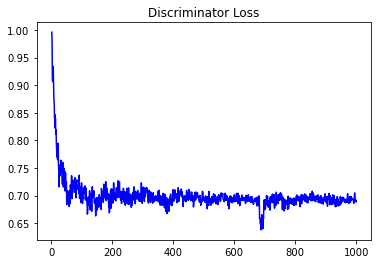

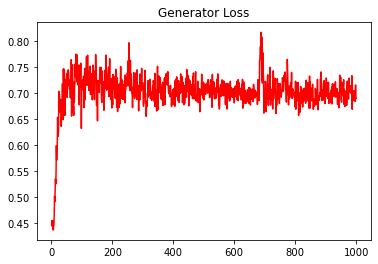

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.6686999327559024


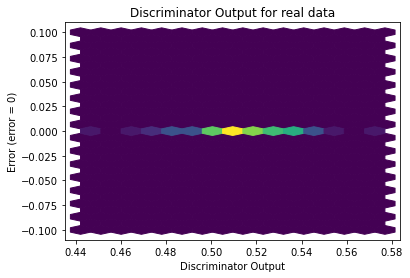

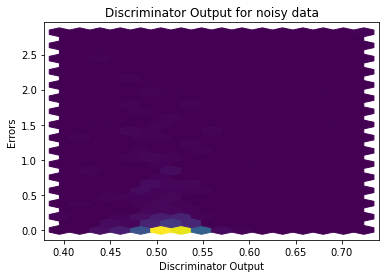

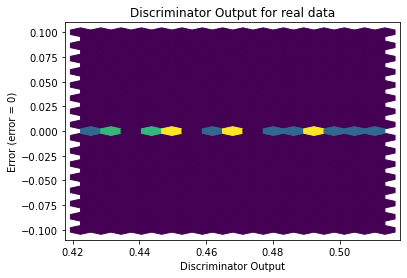

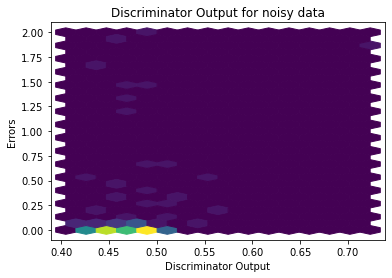

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

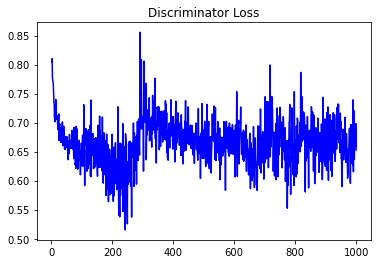

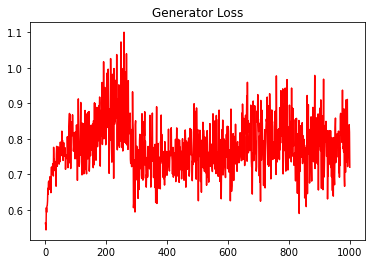

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.9835202387012542


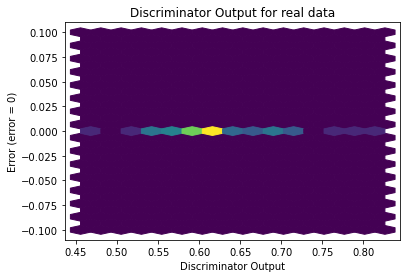

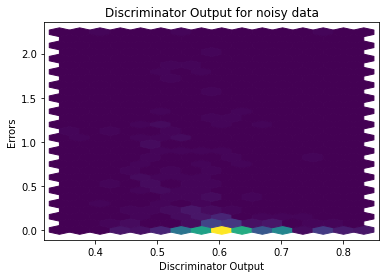

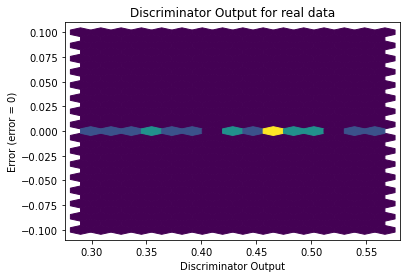

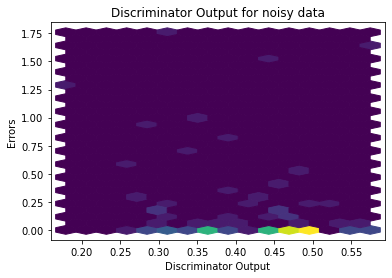

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


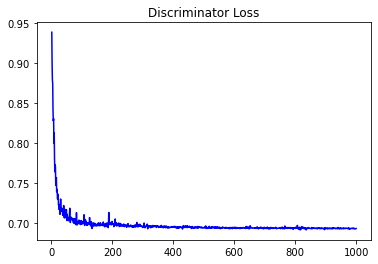

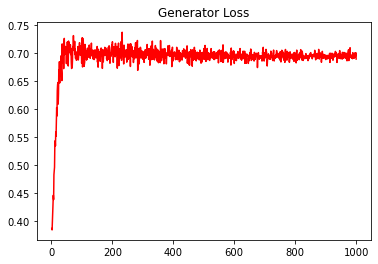

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.32039342432748524


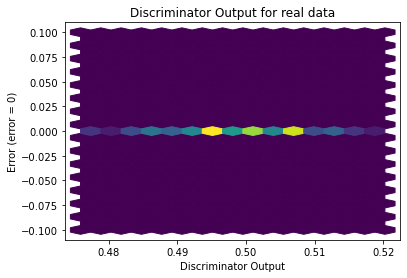

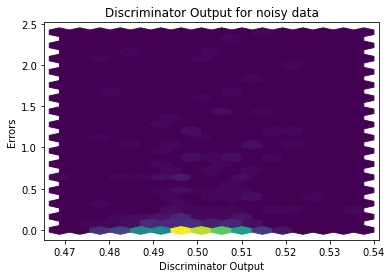

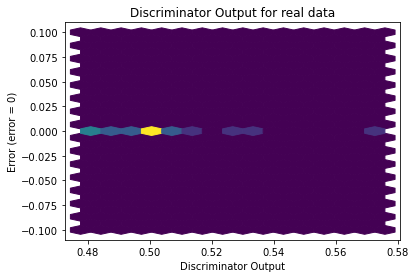

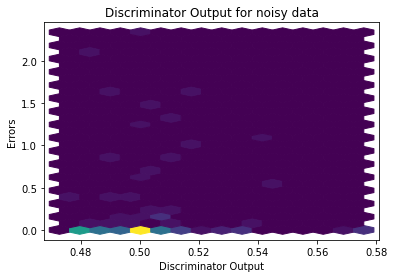

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


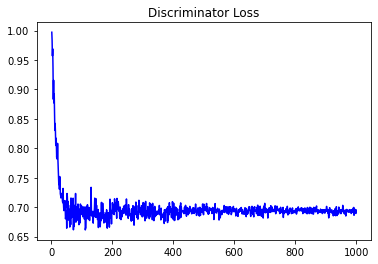

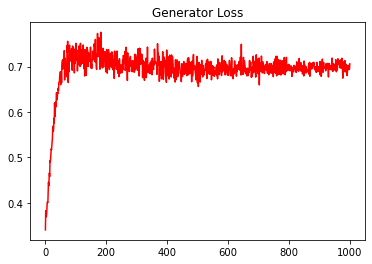

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.323212903576903


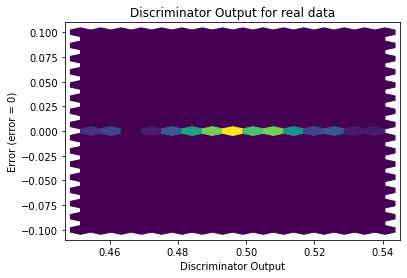

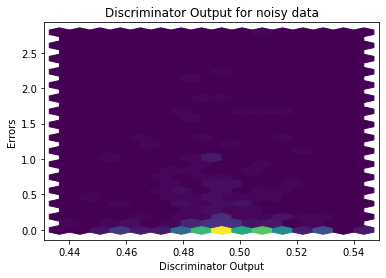

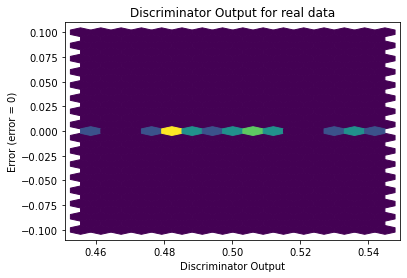

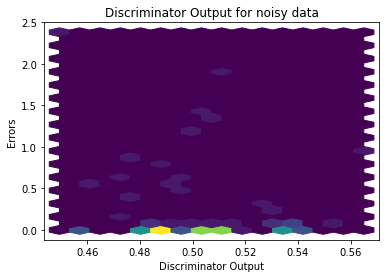

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0873]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2842]], requires_grad=True)
